In [1]:
import math
import os
import pandas as pd
import numpy as np

import ast
from ast import literal_eval

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import datetime as dt
from collections import Counter
import sys

In [2]:
from ai4dr_utils import *

## Loading pickle file with data and classifications

In [3]:
pkl_infile ='AI4DR_annotated_tox21_luc_biochem_p1.pkl'

In [4]:
curves_df = pd.read_pickle(pkl_infile)

In [5]:
curves_df.columns

Index(['SAMPLE_ID', 'pX01_list', 'pX02_list', 'pX12_list', 'pX_list',
       'pXhalf01_list', 'pXhalf02_list', 'pXhalf12_list', 'pXhalf_list',
       'Y01_list', 'Y02_list', 'Y12_list', 'Y_list', 'Y01_list_notr',
       'Y02_list_notr', 'Y12_list_notr', 'Y_list_notr', 'Yhalf01_list',
       'Yhalf02_list', 'Yhalf12_list', 'Yhalf_list', 'Yhalf01_list_notr',
       'Yhalf02_list_notr', 'Yhalf12_list_notr', 'Yhalf_list_notr',
       'Y0Y2halfdiff_q2', 'Y1Y2halfdiff_q2', 'Disp_model012', 'Disp_model01',
       'Disp_model02', 'Disp_model12', 'Disp_modelhalf012', 'Disp_modelhalf01',
       'Disp_modelhalf02', 'Disp_modelhalf12', 'Disp_Proba012',
       'NoDisp_Proba012', 'Disp_Proba01', 'NoDisp_Proba01', 'Disp_Proba02',
       'NoDisp_Proba02', 'Disp_Proba12', 'NoDisp_Proba12', 'Disp_Probahalf012',
       'NoDisp_Probahalf012', 'Disp_Probahalf01', 'NoDisp_Probahalf01',
       'Disp_Probahalf02', 'NoDisp_Probahalf02', 'Disp_Probahalf12',
       'NoDisp_Probahalf12', 'category', 'probability'

In [6]:
curves_df.head()

,SAMPLE_ID,pX01_list,pX02_list,pX12_list,pX_list,pXhalf01_list,pXhalf02_list,pXhalf12_list,pXhalf_list,Y01_list,...,categoryhalf,probabilityhalf,categoryhalf01,probabilityhalf01,categoryhalf02,probabilityhalf02,categoryhalf12,probabilityhalf12,ASSAY_OUTCOME,CURVE_CLASS2
0,NCGC00013058-02,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[46.812237964999994, 48.583606364999994, 46.7...",...,P,0.999388,P,0.999007,P,0.999024,P,0.998608,active antagonist,-2.1
1,NCGC00013082-04,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[0.9130774599999998, 1.9847553899999997, 1.75...",...,CNA,0.999992,CNA,0.999761,CNA,0.999810,CNA,0.999867,inactive,4.0
2,NCGC00013095-10,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[1.360496725, -0.5589206550000001, 1.85764312...",...,CNA,0.999982,CNA,0.999855,CNA,0.999715,CNA,0.999743,inactive,4.0
3,NCGC00013109-03,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[34.06203639, 37.155161410000005, 41.56711209...",...,P,0.999872,P,0.992772,P,0.994459,P,0.993565,active antagonist,-1.1
4,NCGC00013130-04,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[-0.29289335499999947, 3.025096295000001, 4.6...",...,CNA,0.999995,CNA,0.999659,CNA,0.999777,CNA,0.999876,inactive,4.0


In [7]:
curves_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9477 entries, 0 to 9476
Data columns (total 69 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SAMPLE_ID            9477 non-null   object 
 1   pX01_list            9477 non-null   object 
 2   pX02_list            9477 non-null   object 
 3   pX12_list            9477 non-null   object 
 4   pX_list              9477 non-null   object 
 5   pXhalf01_list        9477 non-null   object 
 6   pXhalf02_list        9477 non-null   object 
 7   pXhalf12_list        9477 non-null   object 
 8   pXhalf_list          9477 non-null   object 
 9   Y01_list             9477 non-null   object 
 10  Y02_list             9477 non-null   object 
 11  Y12_list             9477 non-null   object 
 12  Y_list               9477 non-null   object 
 13  Y01_list_notr        9477 non-null   object 
 14  Y02_list_notr        9477 non-null   object 
 15  Y12_list_notr        9477 non-null   o

# A few simple analyses : 
- most curves are predicted with a probability higher than 0.9
- most of these low probability predictions correspond to other classifications than 'Clearly Non-Active'
- the number of samples classified in different categories is counted.

In [8]:
curves_df.query("probability < 0.9").shape

(312, 69)

In [9]:
curves_df.query("category != 'CNA'  and probability < 0.9").shape

(265, 69)

In [10]:
curves_df.query("category != 'CNA'").shape

(1051, 69)

In [11]:
Counter(curves_df['category'])

Counter({'P': 559,
         'CNA': 8426,
         'CANB': 142,
         'W': 265,
         'CASIG': 53,
         'CAHS': 18,
         'CANT': 1,
         'LS': 3,
         'B': 8,
         'CATOP': 2})

In [12]:
curves_notcna_df = curves_df.query("category != 'CNA' ")

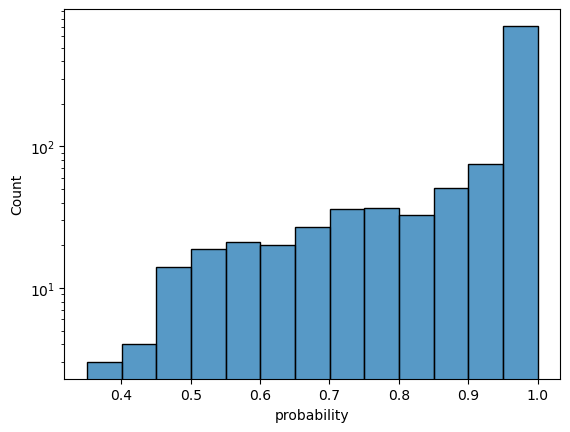

In [13]:
ax = sns.histplot(x = "probability", data = curves_notcna_df, binwidth=0.05 )
ax.set_yscale("log")


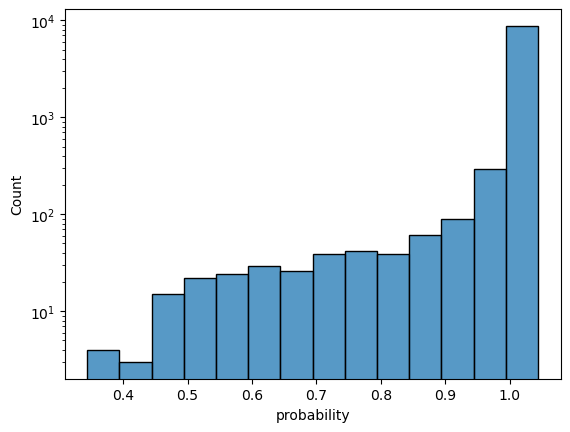

In [14]:
ax = sns.histplot(x = "probability", data = curves_df, binwidth=0.05 )
ax.set_yscale("log")

# The final AI4DR categories are determined

In [15]:
curves_df[['Final_cat01','Final_proba01']] = curves_df.apply(lambda x: categorize(x['Disp_Proba01'], x['probability01'],x['category01']), axis=1,result_type ='expand')

In [16]:
curves_df[['Final_cat02','Final_proba02']] = curves_df.apply(lambda x: categorize(x['Disp_Proba02'], x['probability02'],x['category02']), axis=1,result_type ='expand')

In [17]:
curves_df[['Final_cat12','Final_proba12']] = curves_df.apply(lambda x: categorize(x['Disp_Proba12'], x['probability12'],x['category12']), axis=1,result_type ='expand')

In [18]:
curves_df[['Final_cat012','Final_proba012']] = curves_df.apply(lambda x: categorize(x['Disp_Proba012'], x['probability'],x['category']), axis=1,result_type ='expand')

In [19]:
curves_df[['Final_cathalf012','Final_probahalf012']] = curves_df.apply(lambda x: categorize(x['Disp_Probahalf012'], x['probabilityhalf'],x['categoryhalf']), axis=1,result_type ='expand')

# A few more simple analyses are performed on the final categories

With a comparison with ASSAY_OUTCOME and CURVE_CLASS2

In [20]:
Counter(curves_df['Final_cathalf012'])

Counter({'P': 450,
         'CNA': 8328,
         'Low Probability': 297,
         'Dispersion': 106,
         'CASIG': 38,
         'W': 139,
         'CANB': 110,
         'CAHS': 8,
         'LS': 1})

In [21]:
Counter(curves_df['Final_cat012'])

Counter({'P': 454,
         'CNA': 8336,
         'Low Probability': 297,
         'CASIG': 40,
         'W': 140,
         'Dispersion': 91,
         'CANB': 111,
         'CAHS': 7,
         'LS': 1})

In [22]:
pd.crosstab(curves_df.category, curves_df.ASSAY_OUTCOME)

ASSAY_OUTCOME,active agonist,active antagonist,inactive,inconclusive,inconclusive agonist,inconclusive antagonist
category,,,,,,
B,0,5,2,0,0,1
CAHS,0,18,0,0,0,0
CANB,0,142,0,0,0,0
CANT,0,1,0,0,0,0
CASIG,0,53,0,0,0,0
CATOP,0,1,0,0,0,1
CNA,1,97,7962,1,5,360
LS,0,3,0,0,0,0
P,0,550,0,0,0,9


In [23]:
pd.crosstab(curves_df.Final_cat012, curves_df.ASSAY_OUTCOME)

ASSAY_OUTCOME,active agonist,active antagonist,inactive,inconclusive,inconclusive agonist,inconclusive antagonist
Final_cat012,,,,,,
CAHS,0,7,0,0,0,0
CANB,0,111,0,0,0,0
CASIG,0,40,0,0,0,0
CNA,1,68,7922,1,5,339
Dispersion,0,38,44,0,0,9
LS,0,1,0,0,0,0
Low Probability,0,247,3,0,0,47
P,0,449,0,0,0,5
W,0,92,3,0,0,45


In [24]:
pd.crosstab(curves_df.Final_cat012, curves_df.Final_cathalf012)

Final_cathalf012,CAHS,CANB,CASIG,CNA,Dispersion,LS,Low Probability,P,W
Final_cat012,,,,,,,,,
CAHS,7,0,0,0,0,0,0,0,0
CANB,0,109,0,0,2,0,0,0,0
CASIG,0,0,38,0,2,0,0,0,0
CNA,0,0,0,8320,16,0,0,0,0
Dispersion,1,1,0,8,75,0,4,2,0
LS,0,0,0,0,0,1,0,0,0
Low Probability,0,0,0,0,4,0,293,0,0
P,0,0,0,0,6,0,0,448,0
W,0,0,0,0,1,0,0,0,139


In [25]:
pd.crosstab(curves_df.ASSAY_OUTCOME, curves_df.CURVE_CLASS2)

CURVE_CLASS2,-3.0,-2.4,-2.3,-2.2,-2.1,-1.4,-1.3,-1.2,-1.1,2.2,2.4,3.0,4.0
ASSAY_OUTCOME,,,,,,,,,,,,,
active agonist,0,0,0,0,0,0,0,0,0,1,0,0,0
active antagonist,70,25,1,149,480,4,1,36,280,0,0,0,7
inactive,30,39,0,0,0,0,0,0,0,0,2,3,7898
inconclusive,1,0,0,0,0,0,0,0,0,0,0,0,0
inconclusive agonist,0,0,0,0,0,0,0,0,0,1,1,0,3
inconclusive antagonist,50,35,1,92,38,0,0,15,3,0,0,0,211


In [26]:
pd.crosstab(curves_df.category, curves_df.CURVE_CLASS2)

CURVE_CLASS2,-3.0,-2.4,-2.3,-2.2,-2.1,-1.4,-1.3,-1.2,-1.1,2.2,2.4,3.0,4.0
category,,,,,,,,,,,,,
B,0,0,0,1,3,0,0,2,0,0,0,0,2
CAHS,0,0,0,0,0,0,1,0,17,0,0,0,0
CANB,0,0,0,0,65,0,0,0,77,0,0,0,0
CANT,0,0,0,0,0,0,0,0,1,0,0,0,0
CASIG,0,0,0,0,0,0,0,0,53,0,0,0,0
CATOP,1,0,0,0,1,0,0,0,0,0,0,0,0
CNA,80,93,0,124,14,3,0,24,2,2,3,3,8078
LS,0,0,0,0,2,0,0,1,0,0,0,0,0
P,12,2,1,30,361,0,0,19,130,0,0,0,4


In [27]:
pd.crosstab(curves_df.Final_cat012, curves_df.CURVE_CLASS2)

CURVE_CLASS2,-3.0,-2.4,-2.3,-2.2,-2.1,-1.4,-1.3,-1.2,-1.1,2.2,2.4,3.0,4.0
Final_cat012,,,,,,,,,,,,,
CAHS,0,0,0,0,0,0,0,0,7,0,0,0,0
CANB,0,0,0,0,55,0,0,0,56,0,0,0,0
CASIG,0,0,0,0,0,0,0,0,40,0,0,0,0
CNA,69,91,0,104,10,3,0,20,1,2,3,3,8030
Dispersion,1,1,0,3,10,0,1,1,28,0,0,0,46
LS,0,0,0,0,1,0,0,0,0,0,0,0,0
Low Probability,32,4,0,82,97,1,0,15,45,0,0,0,21
P,9,0,1,14,310,0,0,13,105,0,0,0,2
W,40,3,1,38,35,0,0,2,1,0,0,0,20


In [28]:
curves_df.query("category != 'CNA'  and Disp_Proba012 > 0.5").shape

(47, 79)

In [29]:
curves_df.query("Disp_Proba012 > 0.5 and probability< 0.9").shape

(15, 79)

In [30]:
curves_df.query("category != 'CNA'  and Disp_Proba012 > 0.5 and probability< 0.9").shape

(14, 79)

In [31]:
curves_df.query("Disp_Proba012 > 0.5").shape

(91, 79)

# AI4DR categories determined on all three replica and on replica 1 and 2 are compared
In such a way that the rows and columns are ordered the same for easier comparison

In [32]:
crosstab_df = pd.crosstab(curves_df.category12, curves_df.category)

In [33]:
all_categories = list(set(list(crosstab_df.columns) + list(crosstab_df.index)))
clean_crosstab_df = pd.DataFrame(columns=all_categories, index= all_categories).fillna(value=0)
clean_crosstab_df.index.name = crosstab_df.index.name
clean_crosstab_df.columns.name = crosstab_df.columns.name
clean_crosstab_df = clean_crosstab_df + crosstab_df
clean_crosstab_df = clean_crosstab_df.fillna(value=0).astype('int32')

In [34]:
clean_crosstab_df

category,B,CAHS,CANB,CANT,CASIG,CATOP,CNA,LS,P,W
category12,,,,,,,,,,
B,2,0,0,0,0,0,0,0,3,1
CAHS,0,12,4,0,0,0,0,0,0,0
CANB,0,5,125,0,1,1,0,0,14,0
CANT,0,0,0,0,0,0,0,0,0,0
CASIG,0,1,0,1,50,0,0,0,1,0
CATOP,0,0,0,0,0,1,0,0,1,0
CNA,1,0,0,0,0,0,8373,1,3,55
LS,0,0,0,0,0,0,0,1,0,0
P,4,0,13,0,2,0,4,1,505,24


Same for the classification of DR curves using all concentrations and using half of the concentrations

In [35]:
crosstab_full_vs_half_df = pd.crosstab(curves_df.category12, curves_df.categoryhalf12)

In [36]:
all_categories = list(set(list(crosstab_full_vs_half_df.columns) + list(crosstab_full_vs_half_df.index)))
clean_crosstab_full_vs_half_df = pd.DataFrame(columns=all_categories, index= all_categories).fillna(value=0)
clean_crosstab_full_vs_half_df.index.name = crosstab_full_vs_half_df.index.name
clean_crosstab_full_vs_half_df.columns.name = crosstab_full_vs_half_df.columns.name
clean_crosstab_full_vs_half_df = clean_crosstab_full_vs_half_df + crosstab_full_vs_half_df
clean_crosstab_full_vs_half_df = clean_crosstab_full_vs_half_df.fillna(value=0).astype('int32')


In [37]:
crosstab_full_vs_half_df

categoryhalf12,B,CAHS,CANB,CANT,CASIG,CATOP,CNA,LS,P,W
category12,,,,,,,,,,
B,1,0,0,0,0,0,1,0,1,3
CAHS,0,8,4,0,4,0,0,0,0,0
CANB,0,9,111,0,21,2,0,0,3,0
CASIG,0,1,0,1,51,0,0,0,0,0
CATOP,0,0,0,0,0,1,0,0,1,0
CNA,0,0,0,0,0,0,8421,1,0,11
LS,0,0,0,0,0,0,0,1,0,0
P,1,0,7,0,2,0,4,1,525,13
W,0,0,0,0,0,0,20,0,21,226


Comparison between the AI4DR categories determined on all concentrations and all replica with the Tox21 assay outcome

In [38]:
pd.crosstab(curves_df.Final_cat012, curves_df.ASSAY_OUTCOME)

ASSAY_OUTCOME,active agonist,active antagonist,inactive,inconclusive,inconclusive agonist,inconclusive antagonist
Final_cat012,,,,,,
CAHS,0,7,0,0,0,0
CANB,0,111,0,0,0,0
CASIG,0,40,0,0,0,0
CNA,1,68,7922,1,5,339
Dispersion,0,38,44,0,0,9
LS,0,1,0,0,0,0
Low Probability,0,247,3,0,0,47
P,0,449,0,0,0,5
W,0,92,3,0,0,45


In [39]:
pd.crosstab(curves_df.Final_cat012, curves_df.ASSAY_OUTCOME).T

Final_cat012,CAHS,CANB,CASIG,CNA,Dispersion,LS,Low Probability,P,W
ASSAY_OUTCOME,,,,,,,,,
active agonist,0,0,0,1,0,0,0,0,0
active antagonist,7,111,40,68,38,1,247,449,92
inactive,0,0,0,7922,44,0,3,0,3
inconclusive,0,0,0,1,0,0,0,0,0
inconclusive agonist,0,0,0,5,0,0,0,0,0
inconclusive antagonist,0,0,0,339,9,0,47,5,45


# Samples selection and curves images saving
From now on, different selections are performed, some curves are displayed for inspection, and saved.

In [40]:
columns_subset = ['SAMPLE_ID', 'pX_list', 'Y_list', 'Y_list_notr', 'pX12_list', 'Y12_list', 'Y12_list_notr', 'Disp_model012', 'Disp_Proba012', 'category', 'probability', 'Final_cat012', 'Final_proba012','ASSAY_OUTCOME']

In [41]:
curr_curves_df = curves_df.query("(ASSAY_OUTCOME == 'active agonist' or ASSAY_OUTCOME == 'inconclusive' or ASSAY_OUTCOME == 'inconclusive agonist')  and Final_cat012 == 'CNA' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

In [42]:
curr_curves_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 4510 to 2716
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SAMPLE_ID       7 non-null      object 
 1   pX_list         7 non-null      object 
 2   Y_list          7 non-null      object 
 3   Y_list_notr     7 non-null      object 
 4   pX12_list       7 non-null      object 
 5   Y12_list        7 non-null      object 
 6   Y12_list_notr   7 non-null      object 
 7   Disp_model012   7 non-null      object 
 8   Disp_Proba012   7 non-null      float64
 9   category        7 non-null      object 
 10  probability     7 non-null      float64
 11  Final_cat012    7 non-null      object 
 12  Final_proba012  7 non-null      float64
 13  ASSAY_OUTCOME   7 non-null      object 
dtypes: float64(3), object(11)
memory usage: 840.0+ bytes


Dataframe size : 7 showing the 7 first entries


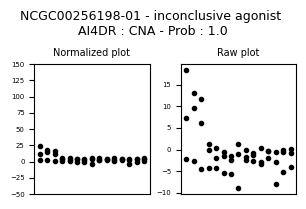

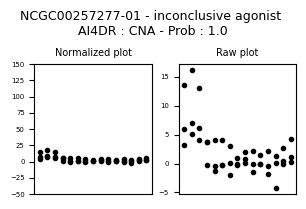

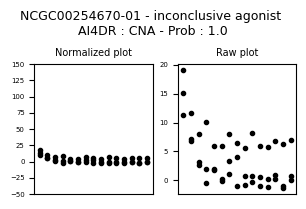

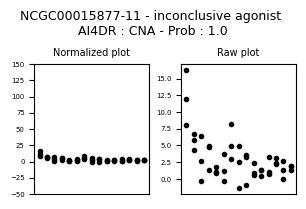

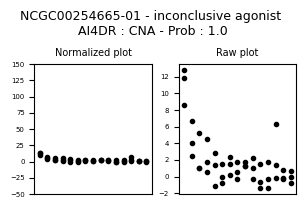

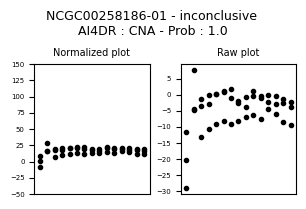

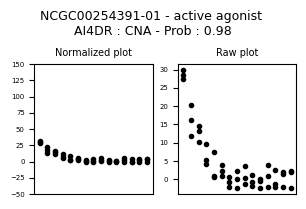

In [43]:
summarize_viz_triplicate_selection(curr_curves_df,size=7)

Dataframe size : 7 showing the 7 first entries


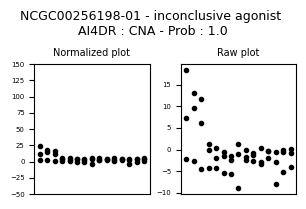

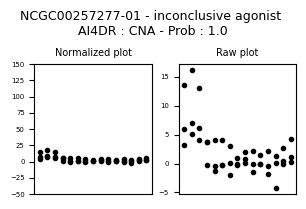

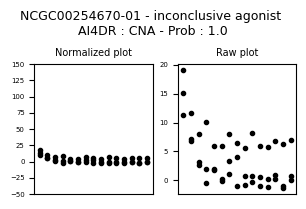

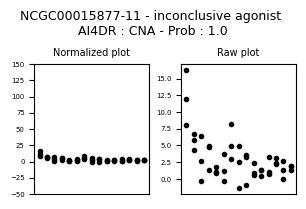

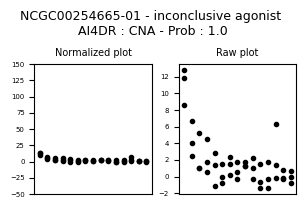

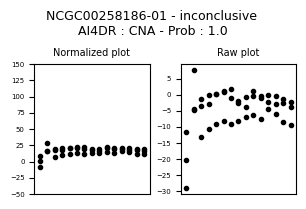

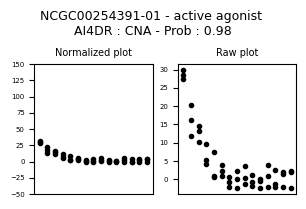

In [44]:
summarize_save_triplicate_selection(curr_curves_df,'inconclusive_CNA/',size=7)

In [45]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inconclusive antagonist'  and Final_cat012 == 'Dispersion' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 9 showing the 3 first entries


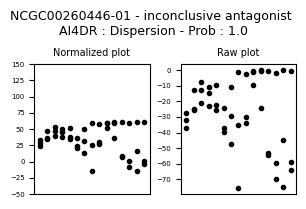

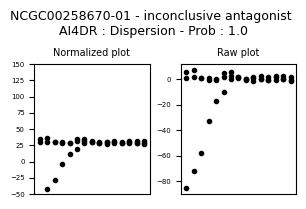

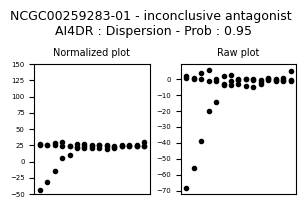

In [46]:
summarize_save_triplicate_selection(curr_curves_df,'inconclusive_antagos/',size=3)

In [47]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inconclusive antagonist'  and Final_cat012 == 'P' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 5 showing the 3 first entries


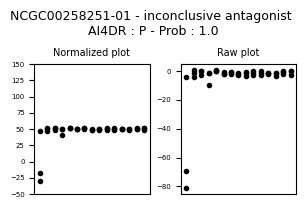

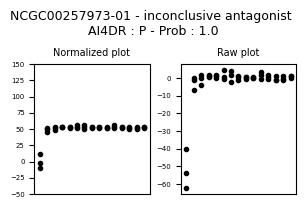

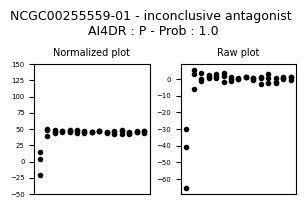

In [48]:
summarize_save_triplicate_selection(curr_curves_df,'inconclusive_antagos/',size=3)

In [49]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inconclusive antagonist'  and Final_cat012 == 'W' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 45 showing the 3 first entries


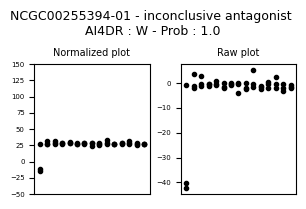

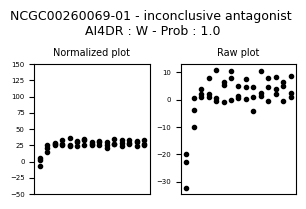

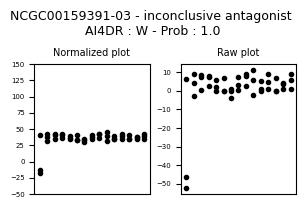

In [50]:
summarize_save_triplicate_selection(curr_curves_df,'inconclusive_antagos/',size=3)

In [51]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inconclusive antagonist'  and Final_cat012 == 'Low Probability' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 47 showing the 3 first entries


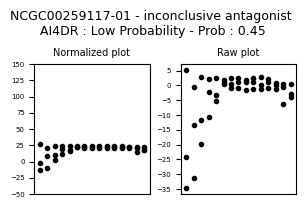

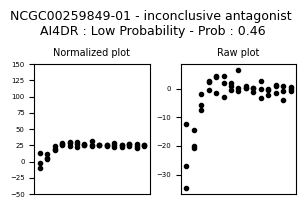

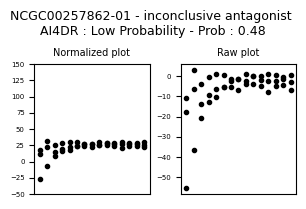

In [52]:
summarize_save_triplicate_selection(curr_curves_df,'inconclusive_antagos/',size=3)

In [53]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and Final_cat012 == 'Low Probability' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 3 showing the 3 first entries


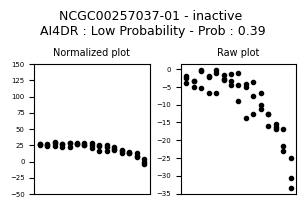

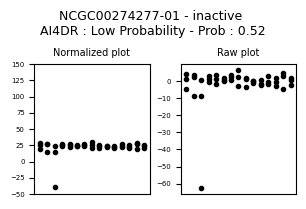

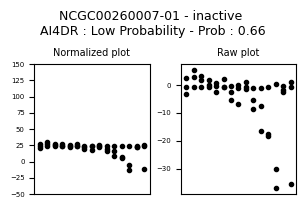

In [54]:
summarize_save_triplicate_selection(curr_curves_df,'inactives/',size=3)

In [55]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and Final_cat012 == 'W' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 3 showing the 3 first entries


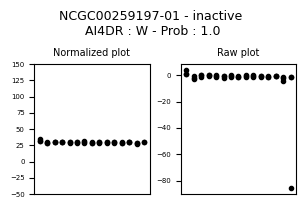

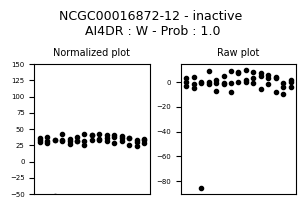

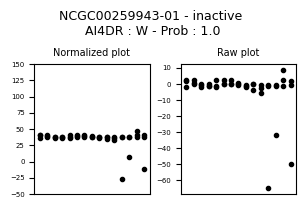

In [56]:
summarize_save_triplicate_selection(curr_curves_df,'inactives/',size=3)

In [57]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and Final_cat012 == 'Dispersion' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 44 showing the 3 first entries


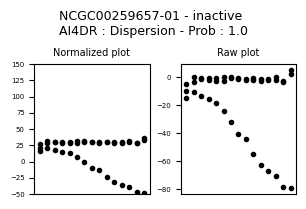

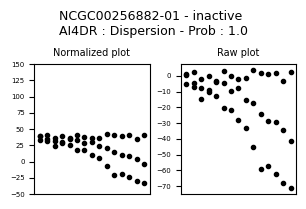

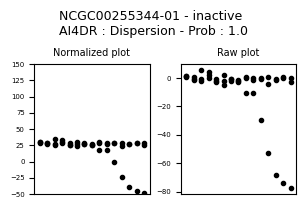

In [58]:
summarize_save_triplicate_selection(curr_curves_df,'inactives/',size=3)

In [59]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and Final_cat012 == 'CNA' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 7922 showing the 3 first entries


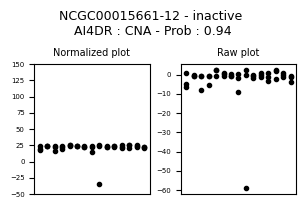

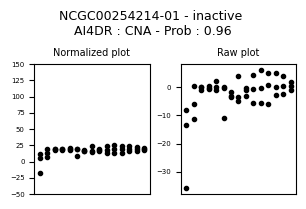

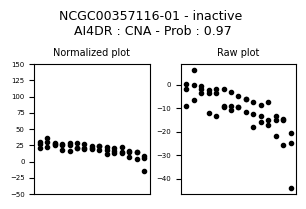

In [60]:
summarize_save_triplicate_selection(curr_curves_df,'inactives/',size=3)

In [61]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and Final_cat012 == 'CNA' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 7922 showing the 3 first entries


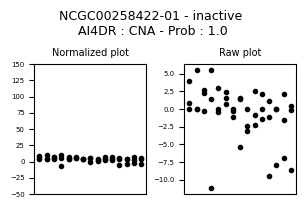

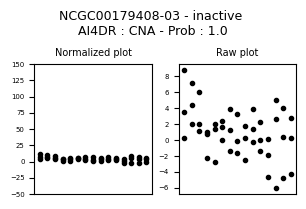

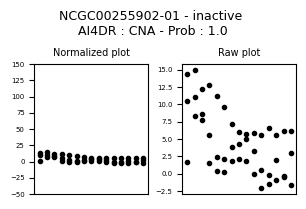

In [62]:
summarize_save_triplicate_selection(curr_curves_df,'inactives/',size=3)

In [63]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'CNA' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 68 showing the 3 first entries


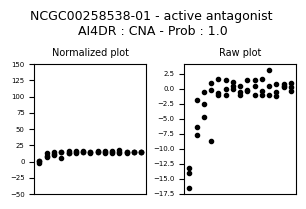

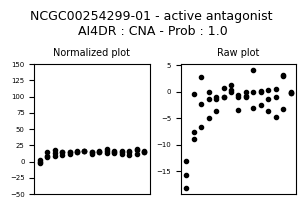

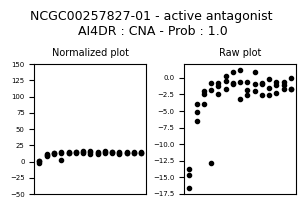

In [64]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_CNA/',size=3)

In [65]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'CNA' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 68 showing the 3 first entries


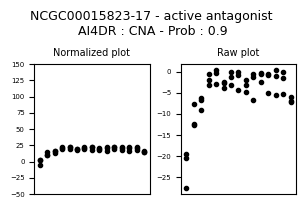

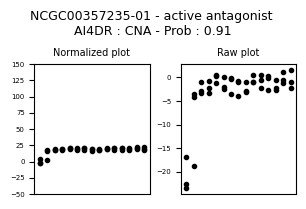

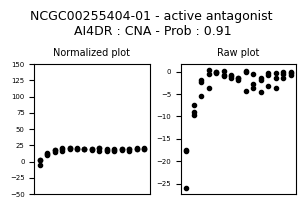

In [66]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_CNA/',size=3)

In [67]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'P' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 449 showing the 3 first entries


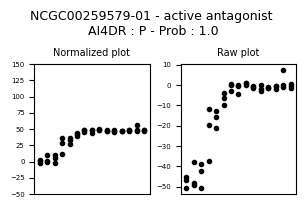

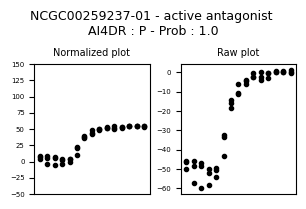

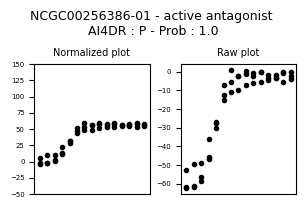

In [68]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_P/',size=3)

In [69]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'P' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 449 showing the 3 first entries


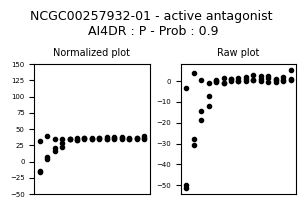

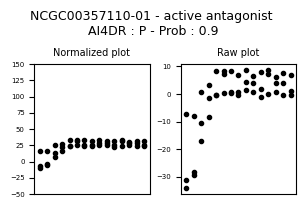

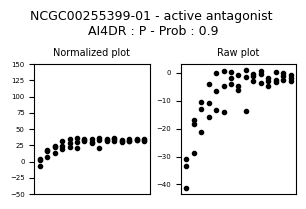

In [70]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_P/',size=3)

In [71]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'W' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 92 showing the 2 first entries


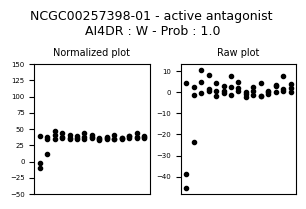

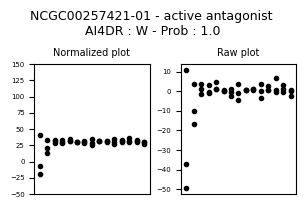

In [72]:
summarize_viz_triplicate_selection(curr_curves_df,size=2)

Dataframe size : 92 showing the 2 first entries


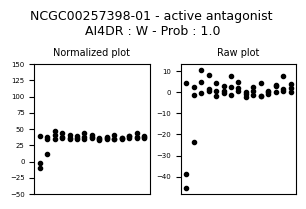

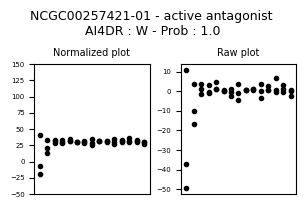

In [73]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_P/',size=2)

In [74]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'Low Probability' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 247 showing the 2 first entries


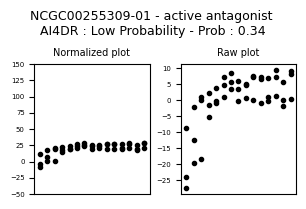

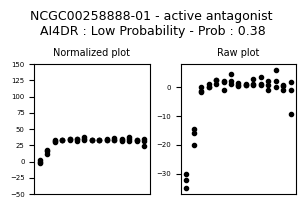

In [75]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_P/',size=2)

In [76]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'Dispersion' ").sort_values(by='Final_proba012', ascending=False)[columns_subset]

Dataframe size : 38 showing the 3 first entries


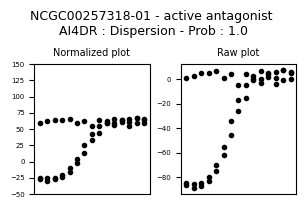

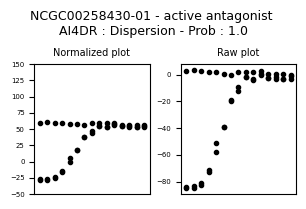

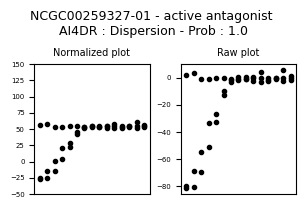

In [77]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_P/',size=3)

Dataframe size : 38 showing the 2 first entries


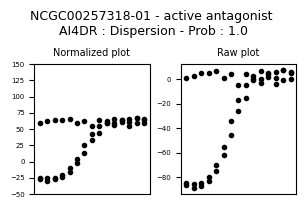

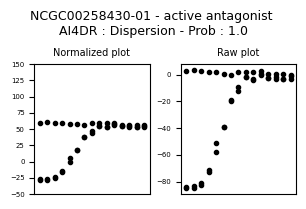

In [78]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_P/',size=2)

In [79]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and Final_cat012 == 'LS' ").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 1 showing the 2 first entries


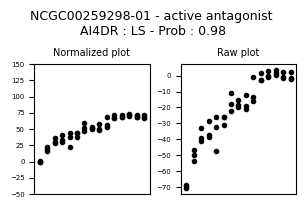

In [80]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_P/',size=2)

In [81]:
# CASIG curves : clearly actives, sigmoidal shape
curr_curves_df = curves_df.query("Final_cat012 == 'CASIG'").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 40 showing the 2 first entries


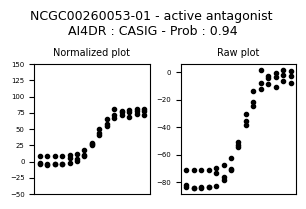

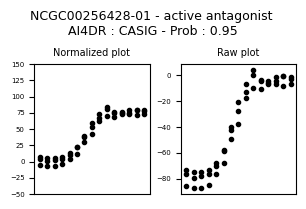

In [82]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_CAXX/',size=2)

In [83]:
curr_curves_df = curves_df.query("Final_cat012 == 'CANB'").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 111 showing the 2 first entries


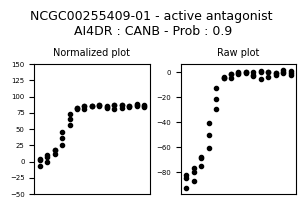

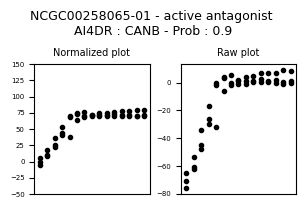

In [84]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_CAXX/',size=2)

In [85]:
# CAHS curves : clearly actives, high slope
curr_curves_df = curves_df.query("Final_cat012 == 'CAHS'").sort_values(by='Final_proba012', ascending=True)[columns_subset]

Dataframe size : 7 showing the 2 first entries


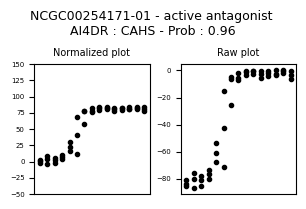

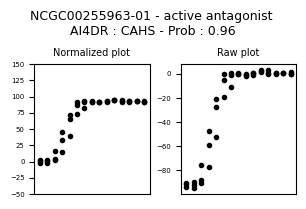

In [86]:
summarize_save_triplicate_selection(curr_curves_df,'active_antago_CAXX/',size=2)